***Ques1: Using sklearn.datasets.load_diabetes apply Variance method for removing the constant column also after applying the Variance method apply multi linear regression on that data***

In [8]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Create a pandas dataframe
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

In [10]:
# Apply variance threshold to remove constant columns
selector = VarianceThreshold(threshold=0.0)
X = selector.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Train a multiple linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Evaluate the model on the test set
score = reg.score(X_test, y_test)
print('R^2 score:', score)

R^2 score: 0.452606602161738


***Ques2: Using sklearn.datasets.load_wine Apply Correlation and make a heat map using seaborn and remove the highly correlated columns if exist and the apply SVM and get the best accuracy by changing the Hyperparameters***


In [12]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [13]:
# Load the wine dataset
wine = load_wine()

# Convert the dataset to a pandas dataframe
df = pd.DataFrame(wine.data, columns=wine.feature_names)

<AxesSubplot:>

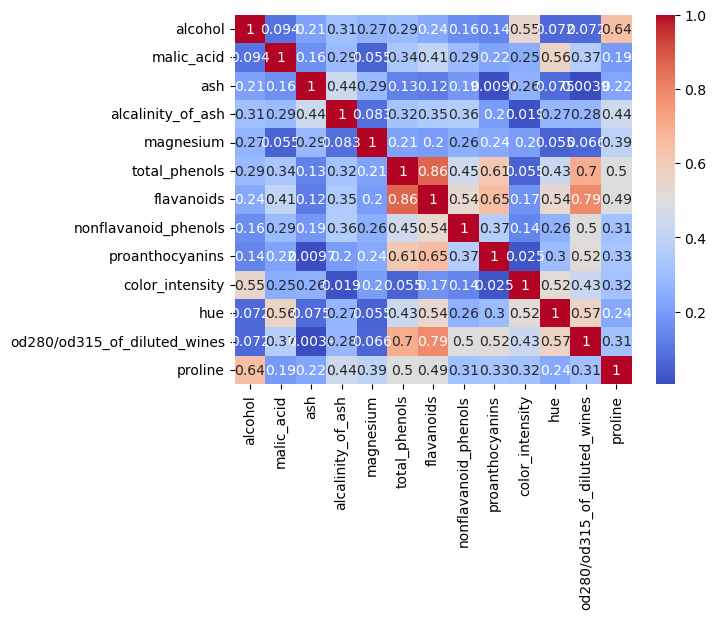

In [14]:
# Calculate the correlation matrix and create a heatmap using seaborn
sns.heatmap(df.corr().abs(), annot=True, cmap='coolwarm')

In [15]:
# Remove the highly correlated features
to_drop = ['total_phenols', 'flavanoids', 'od280/od315_of_diluted_wines']
df.drop(to_drop, axis=1, inplace=True)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, wine.target, test_size=0.2, random_state=42)

In [17]:
# Define the SVM model and the hyperparameters to optimize
svm = SVC()
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto']}

# Use GridSearchCV to optimize the hyperparameters and fit the model
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [18]:
# Print the best hyperparameters and the accuracy on the test set
print('Best hyperparameters:', grid_search.best_params_)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Best hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9444444444444444


***Ques 3: Using sklearn.datasets.load_diabetes apply Mutual info Classification and check which are the best columns according to the target column.***

In [30]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV

In [31]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Convert the dataset to a pandas dataframe
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [32]:
# Compute the mutual information between each feature and the target variable
mutual_info = mutual_info_regression(df, diabetes.target)

# Create a pandas Series with the mutual information values and feature names
mi_series = pd.Series(mutual_info, index=df.columns)

In [33]:
# Sort the features by their mutual information values in descending order
mi_series_sorted = mi_series.sort_values(ascending=False)

# Print the top 5 features with their corresponding mutual information values
print(mi_series_sorted.head())

bmi    0.177013
s5     0.149307
s6     0.101559
s4     0.097391
s3     0.077517
dtype: float64


***Ques 4: Then Apply decision tree on that data and try to get best accuracy by changing the hyperparameters***

In [34]:
top_features = ['bmi', 's5', 's4', 's6', 's1']
X = df[top_features]
y = diabetes.target

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Define the decision tree model and the hyperparameters to optimize
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
param_grid = {'max_depth': [3, 5, 7, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

In [37]:
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}


In [38]:
# Use the best model to make predictions on the test set
y_pred = grid_search.predict(X_test)

from sklearn.metrics import mean_squared_error
# Compute the mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 3792.86711070896


***Ques 5: Using sklearn.datasets.load_boston apply Mutual info Regression and check which are the best columns according to the target column.*** 

In [43]:
from sklearn.datasets import load_boston
from sklearn.feature_selection import mutual_info_regression

# Load the Boston Housing dataset
boston = load_boston()

# Compute mutual information regression between features and target
mutual_info = mutual_info_regression(boston.data, boston.target)

# Create a dataframe with feature names and mutual information scores
feature_mi_scores = pd.DataFrame({'feature_names': boston.feature_names, 'mi_scores': mutual_info})

# Sort the features by mutual information score in descending order
feature_mi_scores = feature_mi_scores.sort_values(by='mi_scores', ascending=False)

# Print the top 10 features with their mutual information scores
print(feature_mi_scores.head(10))


   feature_names  mi_scores
12         LSTAT   0.669549
5             RM   0.528796
4            NOX   0.463297
2          INDUS   0.455346
10       PTRATIO   0.434292
9            TAX   0.349311
0           CRIM   0.340005
6            AGE   0.313912
7            DIS   0.297635
8            RAD   0.218641


C:\Users\SABNAM NAYAK\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

***Ques 6:Then Apply MultiLinear Regression on that data and try to get best accuracy by changing the hyperparameters***


In [44]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the Boston Housing dataset
boston = load_boston()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

C:\Users\SABNAM NAYAK\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

In [45]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [46]:
# Calculate the mean squared error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

# You can try to tune the hyperparameters to improve the accuracy
# For example, you can use Ridge regression to introduce regularization
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE with Ridge Regression:', mse)

MSE: 24.291119474973456
MSE with Ridge Regression: 24.301025500192765


In [47]:
# You can also try to scale the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print('MSE with Scaled Features:', mse)

MSE with Scaled Features: 24.291119474973517
